In [18]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_AN_RF_AN_fold5_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.168628,-0.105423,0.270551,0.028317,-0.211911,-0.085060,0.083504,-0.138048,-0.174466,-0.140155,...,-0.081267,0.055103,-0.059580,0.000331,0.015446,-0.120942,Abnormal,P31,FP-B,AB01
1,-0.102615,-0.100563,0.375555,0.179506,-0.202863,0.053044,0.299665,-0.135393,-0.143777,-0.088539,...,0.036432,-0.034561,-0.061908,0.090412,0.134230,-0.139623,Abnormal,P1,FP-A,AB01
2,-0.153301,-0.093595,0.121402,0.058033,-0.216119,0.045422,0.204417,-0.220251,-0.196129,-0.199197,...,-0.013766,-0.099897,-0.146006,-0.097087,-0.070491,-0.089671,Abnormal,P2,FP-A,AB01
3,-0.162324,-0.105784,0.110982,0.008772,-0.219105,-0.086781,0.041028,-0.170106,-0.201664,-0.195727,...,-0.076934,0.050365,-0.079158,-0.095547,-0.085685,-0.149904,Abnormal,P42,FP-B,AB01
4,-0.159389,-0.119691,0.421336,0.046177,-0.182873,0.150922,0.562665,-0.169549,-0.172541,-0.113588,...,-0.114709,0.067873,-0.071732,-0.036064,-0.025462,-0.153869,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,1.068731,1.025799,-0.134295,-0.105713,0.823317,-0.169376,-0.111787,0.293477,0.946880,0.489999,...,0.234903,-0.167450,-0.071906,0.967422,-0.166078,0.733675,Normal,P32,FP-B,Normal
4597,0.851066,0.095680,-0.087423,0.125713,0.443799,-0.123616,-0.185888,0.461973,0.183871,0.697665,...,-0.086043,-0.186200,-0.130488,0.075347,-0.154827,0.562096,Normal,P42,FP-B,Normal
4598,1.023575,0.514638,-0.158618,-0.076200,0.441495,0.059489,-0.066986,0.588306,0.672361,0.323859,...,-0.072821,-0.138486,0.104547,0.525159,-0.006617,0.883743,Normal,P52,FP-C,Normal
4599,0.427108,0.657781,-0.140116,-0.094766,0.798813,-0.186997,-0.183781,0.848097,0.690396,0.860322,...,-0.074656,-0.069324,-0.161411,1.030767,-0.206721,1.044616,Normal,P61,FP-C,Normal


In [19]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2050]
print(X.shape)
print(y.shape)

(4601, 2048)
(4601,)


In [20]:
y[0]

'FP-B'

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [22]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [23]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.555972,0.034968,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.557059,0.034396,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.556841,0.033655,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.556407,0.034441,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.542060,0.033115,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.619226,0.037334,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.616184,0.039660,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.619444,0.038365,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.612704,0.037046,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.587270,0.035995,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [24]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.5559723663114213

 **print the array of mean scores only 

[0.55597237 0.55705885 0.55684146 0.55640715 0.54205979 0.61922616
 0.6161841  0.61944355 0.61270442 0.58726964 0.65943129 0.65921909
 0.65378006 0.64769546 0.59944355 0.65769311 0.65856267 0.6561709
 0.65030416 0.59683533 0.66247619 0.66182354 0.65552155 0.6542172
 0.59553098]

 **examine the best model 

0.6624761859850985
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=30, n_estimators=400, random_state=1)


In [25]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 0.6624761859850985


# setting parameters

In [26]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 30, n_estimators = 400, min_samples_split = 2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [27]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_AN_RF_AN_fold5_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [28]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.097421,-0.138659,-0.075305,0.004809,-0.166975,-0.162871,0.017836,-0.181519,-0.156809,...,-0.050849,-0.167695,-0.061123,-0.131785,-0.119081,-0.080543,Abnormal,P52,FP-C,AB01
1,1,-0.165519,-0.148170,0.025559,0.191055,-0.116192,0.172783,0.086269,-0.170169,-0.192331,...,0.183026,0.171876,-0.182756,-0.087199,0.039090,-0.102887,Abnormal,P1,FP-A,AB02
2,2,-0.180440,-0.098322,0.252792,0.377349,-0.201334,0.028657,0.169927,-0.229849,-0.202207,...,0.013374,-0.007976,-0.080757,-0.104312,-0.005351,-0.122576,Abnormal,P2,FP-A,AB02
3,3,-0.166250,-0.122344,0.033003,0.317674,-0.237068,-0.036622,0.080454,-0.214761,-0.218280,...,-0.007704,-0.017912,-0.155263,-0.118105,0.006027,-0.138694,Abnormal,P51,FP-C,AB02
4,4,-0.153115,-0.111383,0.023886,0.371484,-0.234303,0.068199,0.113064,-0.232416,-0.214711,...,0.130388,0.013063,-0.183605,-0.096126,-0.029792,-0.133632,Abnormal,P42,FP-B,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,651,0.585565,0.864469,-0.142827,-0.026553,0.704250,-0.195384,-0.141776,0.750391,0.811801,...,-0.057671,-0.040488,0.140646,1.054485,-0.160982,0.827420,Normal,P61,FP-C,Normal
652,652,1.179774,0.748884,-0.174159,-0.137199,0.460761,-0.107073,-0.188199,0.584849,0.655806,...,-0.101403,-0.117468,0.103894,1.278070,-0.086840,0.959453,Normal,P62,FP-C,Normal
653,653,0.424618,0.550699,-0.213252,0.002048,0.424195,-0.173825,-0.166131,0.504484,0.366906,...,-0.090035,-0.211143,-0.061633,0.426217,-0.115330,0.431281,Normal,P71,FP-D,Normal
654,654,0.462852,0.478468,-0.168565,-0.157872,0.423792,-0.219667,-0.172214,0.419736,0.326973,...,-0.157790,-0.205812,-0.106637,0.596187,-0.133564,0.822799,Normal,P72,FP-D,Normal


In [29]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(656, 2048)
(656,)


In [30]:
y_test

0      FP-C
1      FP-A
2      FP-A
3      FP-C
4      FP-B
       ... 
651    FP-C
652    FP-C
653    FP-D
654    FP-D
655    FP-E
Name: Views, Length: 656, dtype: object

In [31]:
y_pred = modelOpt.predict(X_test)

In [32]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 38  61  25   2   2]
 [  8 166  24   4   4]
 [  3  42 136   9   0]
 [  1  13  14  70   0]
 [  1   3   0   0  30]]
              precision    recall  f1-score   support

        FP-A       0.75      0.30      0.42       128
        FP-B       0.58      0.81      0.68       206
        FP-C       0.68      0.72      0.70       190
        FP-D       0.82      0.71      0.77        98
        FP-E       0.83      0.88      0.86        34

    accuracy                           0.67       656
   macro avg       0.73      0.68      0.68       656
weighted avg       0.69      0.67      0.66       656



Text(0.5, 21.5, 'Predicted label')

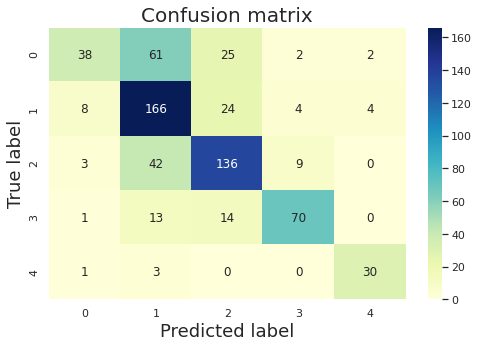

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

# Save Model

In [34]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_5/models/')
filename = "modelrf_AN_5FP_fold5_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)